**Kaggle Resources :**

https://www.kaggle.com/code/kabure/predicting-credit-risk-model-pipeline/notebook

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
path = "gdrive/MyDrive/Dataset/"

In [ ]:
df = pd.read_csv(path+"credit_data_risk.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df.dropna(axis = 0, inplace=True)

In [ ]:
df.nunique()

Unnamed: 0          522
Age                  52
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       503
Duration             30
Purpose               8
Risk                  2
dtype: int64

In [ ]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
df.drop('Unnamed: 0', axis =1, inplace=True)

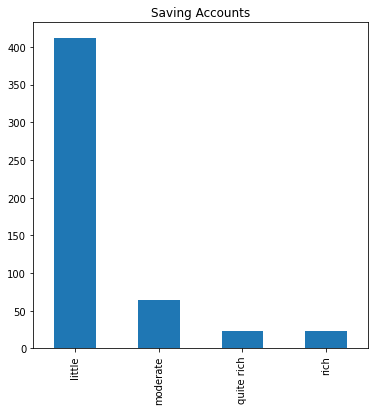

In [ ]:
df['Saving accounts'].value_counts().plot.bar(figsize=(6, 6), title='Saving Accounts', label='')

<BarContainer object of 522 artists>

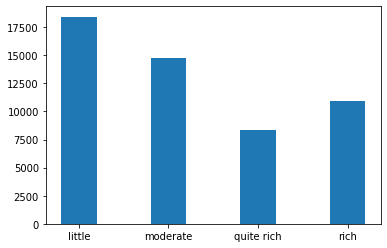

In [ ]:
# df['Credit amount'].value_counts().plot.line(figsize=(6, 6), title='Saving Accounts', label='')
plt.bar(df['Saving accounts'], df['Credit amount'], width = 0.4 )

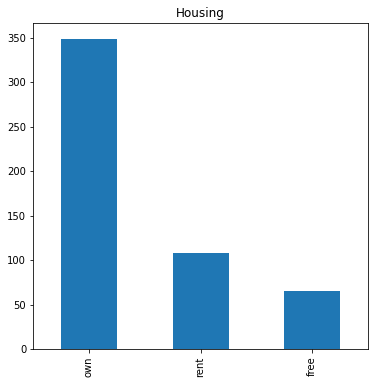

In [ ]:
df['Housing'].value_counts().plot.bar(figsize=(6, 6), title='Housing', label='')

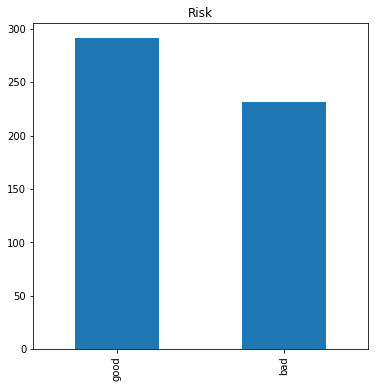

In [ ]:
df['Risk'].value_counts().plot.bar(figsize=(6, 6), title='Risk', label='')

<BarContainer object of 522 artists>

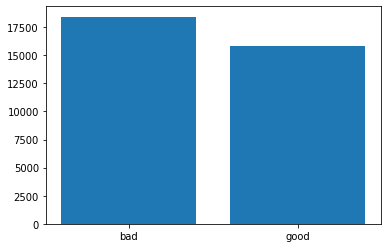

In [ ]:
plt.bar(df['Risk'], df['Credit amount'])

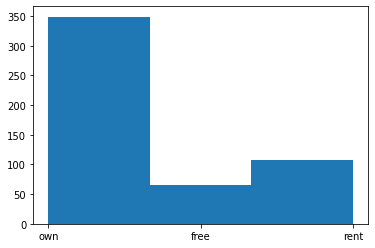

In [ ]:
plt.hist(df['Housing'], bins=3)
plt.show()

In [ ]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)

<BarContainer object of 522 artists>

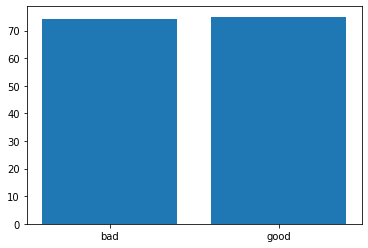

In [ ]:
# df['Age_cat'].value_counts().plot.bar(figsize=(6, 6), title='Age_cat', label='')
plt.bar(df['Risk'], df['Age'])

(array([132.,   0., 107.,   0.,   0., 173.,   0.,   0.,  53.,   0.,   0.,
          6.,   0.,   0.,  14.,   0.,   0.,   9.,   0.,  28.]),
 array([0.  , 0.35, 0.7 , 1.05, 1.4 , 1.75, 2.1 , 2.45, 2.8 , 3.15, 3.5 ,
        3.85, 4.2 , 4.55, 4.9 , 5.25, 5.6 , 5.95, 6.3 , 6.65, 7.  ]),
 <a list of 20 Patch objects>)

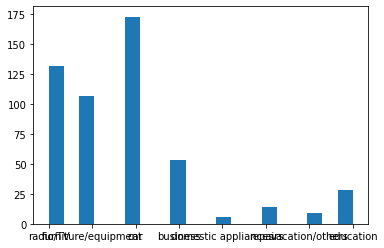

In [ ]:
plt.hist(df['Purpose'], bins=20)

In [ ]:
print("Purpose : ",df.Purpose.unique())
print("Sex : ",df.Sex.unique())
print("Housing : ",df.Housing.unique())
print("Saving accounts : ",df['Saving accounts'].unique())
print("Risk : ",df['Risk'].unique())
print("Checking account : ",df['Checking account'].unique())
print("Age_Cat : ",df['Age_cat'].unique())

Purpose :  ['radio/TV' 'furniture/equipment' 'car' 'business' 'domestic appliances'
 'repairs' 'vacation/others' 'education']
Sex :  ['female' 'male']
Housing :  ['own' 'free' 'rent']
Saving accounts :  ['little' 'moderate' 'quite rich' 'rich']
Risk :  ['bad' 'good']
Checking account :  ['moderate' 'little' 'rich']
Age_Cat :  ['Student', 'Adult', 'Young', 'Senior']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


In [ ]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [ ]:
# df['Saving accounts'] = df['Saving accounts'].fillna('no_inf')
# df['Checking account'] = df['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df = df.merge(pd.get_dummies(df['Purpose'], drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df = df.merge(pd.get_dummies(df['Sex'], drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df = df.merge(pd.get_dummies(df['Housing'], drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df = df.merge(pd.get_dummies(df["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df = df.merge(pd.get_dummies(df['Risk'], prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df = df.merge(pd.get_dummies(df["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df = df.merge(pd.get_dummies(df["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [ ]:
#Excluding the missing columns
del df["Saving accounts"]
del df["Checking account"]
del df["Purpose"]
del df["Sex"]
del df["Housing"]
del df["Age_cat"]
del df["Risk"]
del df['Risk_good']

In [ ]:
#Creating the X and y variables
X = df.drop('Risk_bad', 1).values
y = df["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.508406 (0.118036)
LDA: 0.500619 (0.145315)
KNN: 0.511065 (0.058870)
CART: 0.605925 (0.112648)
NB: 0.554333 (0.154668)
RF: 0.545818 (0.139189)
SVM: 0.028025 (0.034781)
XGB: 0.593198 (0.113353)


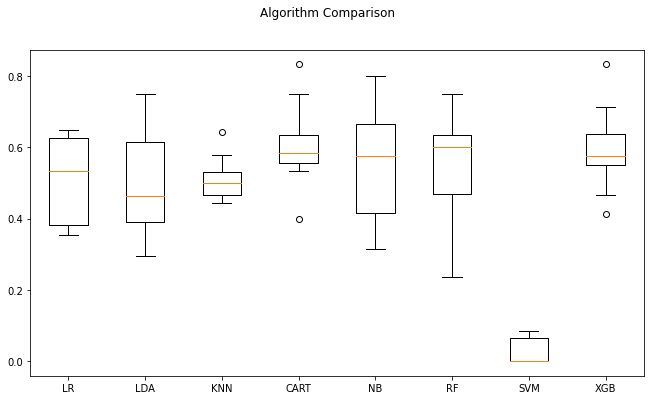

In [ ]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=7, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.200 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.206 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.265 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.147 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.529 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.229 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.206 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.206 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.176 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.559 total time=   0.0s
[CV 1/5] END max_depth=3, max_feature

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='recall', verbose=4)

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.6317647058823529
{'max_depth': None, 'max_features': 7, 'n_estimators': 50}


In [ ]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=15, random_state=2)

In [ ]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.5801526717557252


[[40 31]
 [24 36]]


0.5863192182410423


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [ ]:
# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [ ]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.6624040920716112


In [ ]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.5648854961832062


[[42 29]
 [28 32]]


              precision    recall  f1-score   support

           0       0.60      0.59      0.60        71
           1       0.52      0.53      0.53        60

    accuracy                           0.56       131
   macro avg       0.56      0.56      0.56       131
weighted avg       0.57      0.56      0.57       131



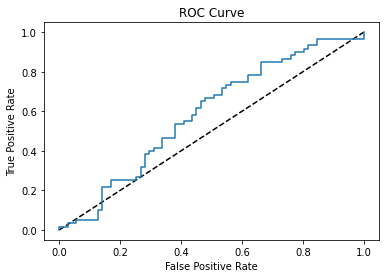

In [ ]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [ ]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.6342948717948718


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.5190839694656488


[[52 19]
 [44 16]]


0.2909090909090909


**Pipeline**

In [ ]:
#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=2),
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 5, 6, 10],
                         'min_child_weight': [3, 5, 10],
                         'subsample': [0.75, 0.8, 0.85]},
             scoring='recall')

In [ ]:
grid_search.best_score_
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 6,
 'min_child_weight': 3,
 'subsample': 0.75}

In [ ]:
y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.6030534351145038


[[45 26]
 [26 34]]


In [ ]:
pearson = df.corr(method='pearson')
pearson

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Housing_rent,Savings_moderate,Savings_quite rich,Savings_rich,Risk_bad,Check_moderate,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
Age,1.000000,0.039771,0.082014,0.001549,0.117918,0.005596,0.013798,-0.106830,-0.095932,0.084132,...,-0.183520,-0.076820,0.016293,0.006781,-0.056114,-0.077272,0.065109,-0.334517,0.573632,0.593259
Job,0.039771,1.000000,0.334721,0.200794,0.044996,-0.006662,0.018530,0.043992,-0.074709,-0.143525,...,-0.017690,0.042549,-0.083963,-0.015545,0.049555,0.050457,-0.050213,0.086734,0.021844,-0.011665
Credit amount,0.082014,0.334721,1.000000,0.613298,0.075708,-0.071680,0.009385,-0.029102,-0.201356,-0.025959,...,-0.009434,0.041816,-0.062641,-0.062935,0.183392,0.132882,-0.127287,0.025686,0.056007,-0.014021
Duration,0.001549,0.200794,0.613298,1.000000,-0.054099,-0.031777,0.020814,-0.035902,-0.066403,-0.035917,...,-0.024143,0.103720,-0.058273,-0.068010,0.293611,0.067100,-0.107376,0.033437,-0.019240,-0.042816
Purpose_car,0.117918,0.044996,0.075708,-0.054099,1.000000,-0.075921,-0.167620,-0.357502,-0.409605,-0.116881,...,-0.007968,0.059427,-0.012346,-0.012346,0.028207,-0.067733,-0.021089,-0.021870,0.097843,0.070794
Purpose_domestic appliances,0.005596,-0.006662,-0.071680,-0.031777,-0.075921,1.000000,-0.025672,-0.054754,-0.062734,-0.017901,...,-0.055076,0.014486,-0.023151,-0.023151,0.012477,-0.057179,0.023254,-0.011462,0.038125,-0.024185
Purpose_education,0.013798,0.018530,0.009385,0.020814,-0.167620,-0.025672,1.000000,-0.120888,-0.138507,-0.039523,...,0.025333,-0.037148,-0.051113,0.031747,0.096023,-0.000263,0.032574,0.021289,-0.006012,-0.013578
Purpose_furniture/equipment,-0.106830,0.043992,-0.029102,-0.035902,-0.357502,-0.054754,-0.120888,1.000000,-0.295408,-0.084295,...,0.068674,-0.117469,-0.016523,0.029723,-0.022458,-0.123834,-0.029287,-0.001962,-0.016778,-0.113883
Purpose_radio/TV,-0.095932,-0.074709,-0.201356,-0.066403,-0.409605,-0.062734,-0.138507,-0.295408,1.000000,-0.096580,...,-0.025137,-0.042785,0.089850,-0.039001,-0.065787,0.056601,0.067092,-0.016553,-0.102844,-0.027282
Purpose_repairs,0.084132,-0.143525,-0.025959,-0.035917,-0.116881,-0.017901,-0.039523,-0.084295,-0.096580,1.000000,...,-0.055517,0.046404,-0.035641,0.022137,-0.004665,0.071689,-0.055806,-0.033891,-0.016769,0.129357


In [ ]:
spearman = df.corr(method='spearman')
spearman

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Housing_rent,Savings_moderate,Savings_quite rich,Savings_rich,Risk_bad,Check_moderate,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
Age,1.000000,0.076236,0.062173,-0.032471,0.129290,0.002447,0.023150,-0.096116,-0.127359,0.058231,...,-0.224734,-0.054903,-0.017852,0.012583,-0.066721,-0.070284,0.061474,-0.202309,0.699651,0.370108
Job,0.076236,1.000000,0.338355,0.202768,0.055633,-0.008359,0.021992,0.040107,-0.089798,-0.133532,...,-0.011463,0.035494,-0.064524,-0.009919,0.052885,0.043206,-0.035281,0.092270,0.008698,0.015571
Credit amount,0.062173,0.338355,1.000000,0.660437,0.054596,-0.097322,-0.051743,0.085612,-0.193244,-0.046113,...,0.024228,0.043413,-0.041813,-0.086506,0.113236,0.073332,-0.116342,0.073296,0.017718,-0.029381
Duration,-0.032471,0.202768,0.660437,1.000000,-0.058257,-0.051718,-0.008184,0.008755,-0.078381,-0.028218,...,0.004173,0.091498,-0.048169,-0.066732,0.278987,0.042547,-0.109005,0.054895,-0.047049,-0.055351
Purpose_car,0.129290,0.055633,0.054596,-0.058257,1.000000,-0.075921,-0.167620,-0.357502,-0.409605,-0.116881,...,-0.007968,0.059427,-0.012346,-0.012346,0.028207,-0.067733,-0.021089,-0.021870,0.097843,0.070794
Purpose_domestic appliances,0.002447,-0.008359,-0.097322,-0.051718,-0.075921,1.000000,-0.025672,-0.054754,-0.062734,-0.017901,...,-0.055076,0.014486,-0.023151,-0.023151,0.012477,-0.057179,0.023254,-0.011462,0.038125,-0.024185
Purpose_education,0.023150,0.021992,-0.051743,-0.008184,-0.167620,-0.025672,1.000000,-0.120888,-0.138507,-0.039523,...,0.025333,-0.037148,-0.051113,0.031747,0.096023,-0.000263,0.032574,0.021289,-0.006012,-0.013578
Purpose_furniture/equipment,-0.096116,0.040107,0.085612,0.008755,-0.357502,-0.054754,-0.120888,1.000000,-0.295408,-0.084295,...,0.068674,-0.117469,-0.016523,0.029723,-0.022458,-0.123834,-0.029287,-0.001962,-0.016778,-0.113883
Purpose_radio/TV,-0.127359,-0.089798,-0.193244,-0.078381,-0.409605,-0.062734,-0.138507,-0.295408,1.000000,-0.096580,...,-0.025137,-0.042785,0.089850,-0.039001,-0.065787,0.056601,0.067092,-0.016553,-0.102844,-0.027282
Purpose_repairs,0.058231,-0.133532,-0.046113,-0.028218,-0.116881,-0.017901,-0.039523,-0.084295,-0.096580,1.000000,...,-0.055517,0.046404,-0.035641,0.022137,-0.004665,0.071689,-0.055806,-0.033891,-0.016769,0.129357
